# Strava Data

Strava is an exercise tracking app that I have used since January 2022. Although there are *numerous* features that can be tracked with this app, I use it simply to track the distance that I have walked or jogged (mostly walking though). 

For my personal purposes, I care most about the dates and distances, so I will likely ignore most other columns (notes, elevation gain, speed, weather conditions, etc.)

I downloaded the data in October 2023, so this will be a little less than 2 years of data. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Note: if you download your data from Strava there are several different files, including maps and lots of other records, 
# but I only care about the activities.csv file
filename_strava = 'Strava_activities.csv'

## Load and Clean Data

In [3]:
df_strava = pd.read_csv(filename_strava,parse_dates = ['Activity Date'])

/var/folders/fl/5xvdkzlj0md2j_l9mvhs2tjc0000gp/T/ipykernel_41799/2927078745.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_strava = pd.read_csv(filename_strava,parse_dates = ['Activity Date'])


There's a warning about the activity date, but it might be ok. I'll take a look at the first few rows to see what this looks like.

In [4]:
df_strava.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">Newly Explored Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.sport_type"">Sport Type</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_steps"">Total Steps</span>",Media
0,6457115070,2022-01-01 16:46:02,Morning Walk,Walk,NaN,2312,1.05,NaN,NaN,False,...,NaN,NaN,0.0,0.455990,0.000000,NaN,NaN,NaN,NaN,NaN
1,6463703624,2022-01-02 22:15:10,Afternoon Walk,Walk,NaN,1782,2.25,NaN,NaN,False,...,NaN,NaN,0.0,1.265275,110.400002,NaN,NaN,NaN,NaN,NaN
2,6472302737,2022-01-04 16:41:02,Morning Walk,Walk,NaN,3026,1.64,NaN,NaN,False,...,NaN,NaN,0.0,0.543979,0.000000,NaN,NaN,NaN,NaN,NaN
3,6482437085,2022-01-06 16:27:23,Lunch Walk,Walk,NaN,3018,4.31,NaN,NaN,False,...,NaN,NaN,0.0,1.429755,3725.199951,NaN,NaN,NaN,NaN,NaN
4,6492989284,2022-01-08 18:40:50,Afternoon Walk,Walk,NaN,6113,8.24,NaN,NaN,False,...,NaN,NaN,0.0,1.348821,7849.600098,NaN,NaN,NaN,NaN,NaN


In [5]:
df_strava.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>',

Like I said before, there are *way* more columns than I care about, so I'll pare this down to the columns I might care about later:

In [6]:
df_strava = df_strava[['Activity Date','Activity Name', 'Elapsed Time', 'Distance']]

In [7]:
# Check for null values
df_strava.isnull().sum()

Activity Date    0
Activity Name    0
Elapsed Time     0
Distance         0
dtype: int64

## Basic Visualizations

I want to see what the data looks like plotting it in a few different ways. I'll start with just a simple scatter of distance walked in each record.

Text(0.5, 0, 'Date')

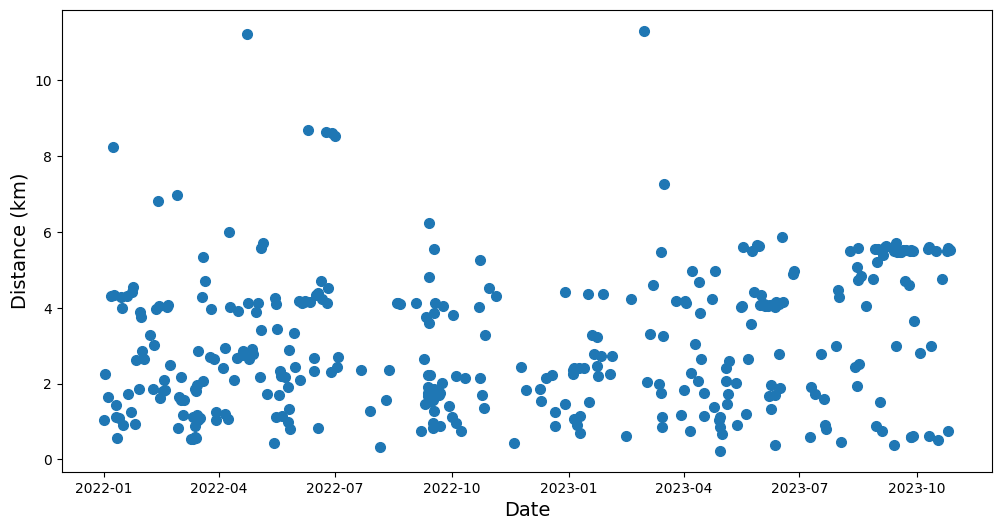

In [8]:
plt.figure(figsize=[12,6])
plt.plot(df_strava['Activity Date'].dt.date,df_strava['Distance'],'.',markersize=14)
plt.ylabel('Distance (km)',fontsize=14)
plt.xlabel('Date',fontsize=14)

**Notes:** This is such a simple visualization but I can see a lot from this, since I lived through it and have some extra domain knowledge! I can see little clusters of walks that are the same distance, for example a lot of walks around 4 km, which was the length of my favorite walking trail in Virginia. You can see a cluster of those 4 km walks in June 2023, when I was walking that trail almost every day before I moved away. After that, beginning in August 2023, there are a lot of walks between 5 and 6 km, which is my usual walking loop here in Texas.

I can also see some areas that look more sparse, which tend to be during times when I was busy, traveling, or the weather was too hot/cold for me to be as motivated to get out as much.

Some of these insights will be easier to see in other kinds of plots though.

Text(0.5, 1.0, 'Distance distribution')

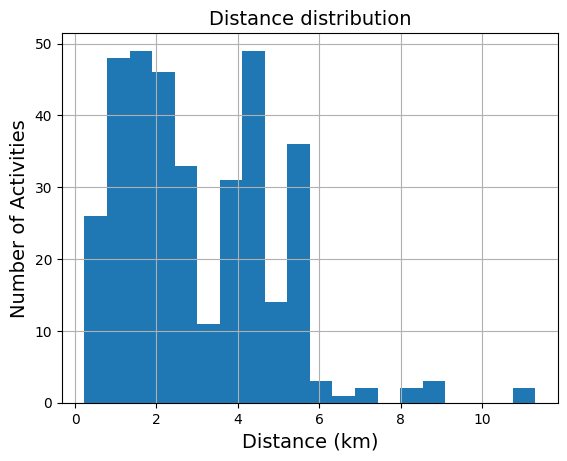

In [9]:
df_strava.hist(column='Distance',bins=20)
plt.ylabel('Number of Activities',fontsize=14)
plt.xlabel('Distance (km)', fontsize=14)
plt.title('Distance distribution', fontsize=14)

This simple histogram shows that I have a lot of walks at shorter distances (1-2 km) but then there are those noteable peaks at a little above 4 and 5.5 km from my trail in VA and my trail in TX.  

Text(0.5, 1.0, 'Total distance since 2022')

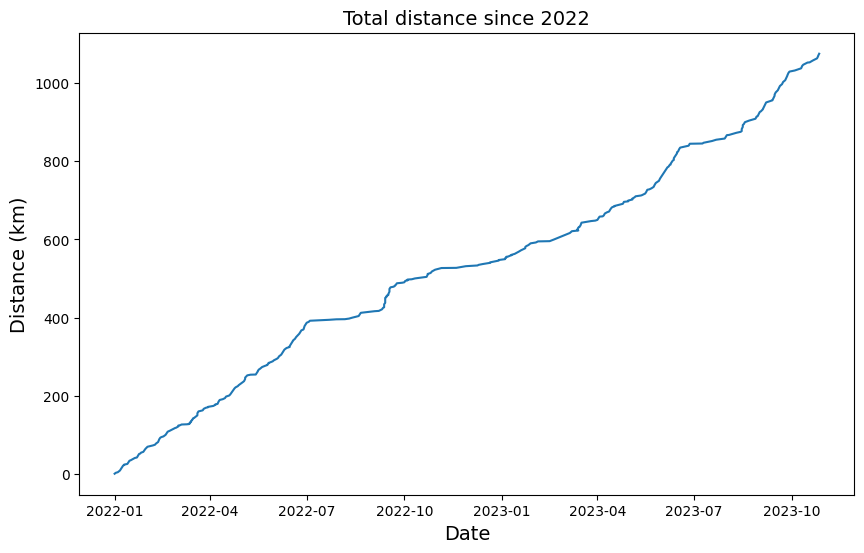

In [10]:
plt.figure(figsize=[10,6])
plt.plot(df_strava['Activity Date'].dt.date,df_strava['Distance'].cumsum())
plt.ylabel('Distance (km)', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.title('Total distance since 2022',fontsize = 14)

Wow! I love to see this upward climb leading to over 1000 km walked! I had **not** realized that I was so much better about walking in the first part of 2022. But it's really obvious in this plot that there's a pretty steady climb all the way until July, and after that the slope clearly decreases and is much less consistent through the next year. 

## Group Data by Month
For the next set of visualizations, I'll group by month. In this monthly data frame, I'll show total distance per month, average distance for each walk each month, and the number of individual segments per month.

In [11]:
df_strava['month_year'] = df_strava['Activity Date'].dt.to_period('M')

In [12]:
month_totals = df_strava.groupby('month_year').aggregate(total_distance=('Distance','sum'), avg_distance=('Distance','mean'), 
                                                        count=('Distance','count')).reset_index()

Text(0.5, 0, '')

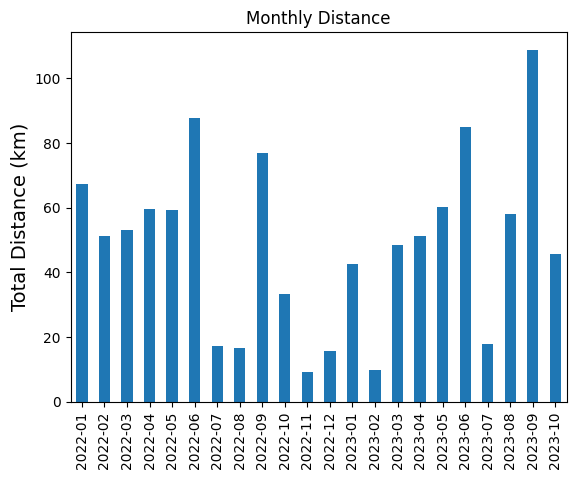

In [13]:
month_totals.plot(x='month_year',y='total_distance', legend=False, kind='bar')
plt.ylabel('Total Distance (km)',fontsize=14)
plt.title('Monthly Distance')
plt.xlabel('')

Text(0.5, 0, '')

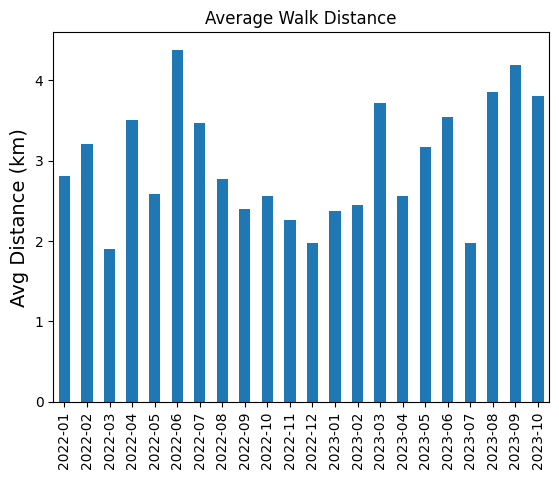

In [14]:
month_totals.plot(x='month_year',y='avg_distance', kind='bar', legend=False)
plt.ylabel('Avg Distance (km)',fontsize=14)
plt.title('Average Walk Distance')
plt.xlabel('')

Text(0.5, 0, '')

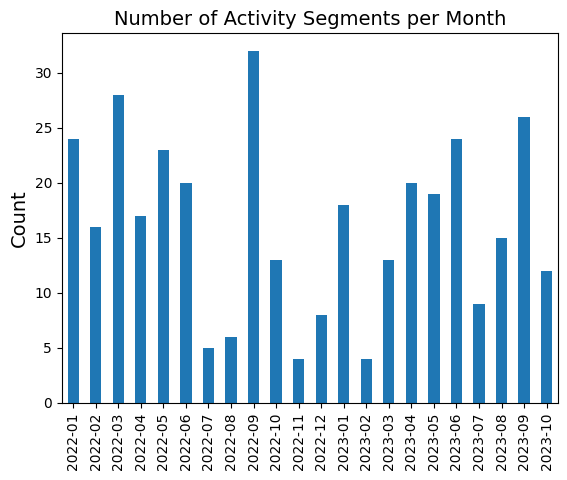

In [15]:
month_totals.plot(kind='bar',x='month_year',y='count',legend=False)
plt.title('Number of Activity Segments per Month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xlabel('')

**Notes:** From the three plots (plus my insider knowledge of my own life), I can notice a few things. For example: September 2022 was the highest number of walks. The average walk distance that month wasn't particularly high but since there were so many of them it was a pretty decent month  for walking. That was primarily because I had a conference in Cardiff for a week, so I walked everywhere. Nothing was particularly far, but that entire week I was walking a couple kilometers multiple times a day, which adds up to a lot of walking!

## Notes for future work
- I made simple bar charts using pandas for these last three plots, and I don't love how they look. Maybe I could combine them with subplots to show them together, and fix the x tick labels to show month names instead of numbers.
- Once I analyze my location data (from Google), I could combine this data with that to show where I did the most walking (I could also get the location data from a different part of the Strava download, but I don't feel the need to do that right now)
- I could also correlate this with my mood data from Daylio.